Let's begin by importing all the needed libraries,

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

and reading the dataset.

In [20]:
df = pd.read_csv('../DATASETS/netflix_reviews.csv')

## Analysis: Getting an initial grasp of the Dataset.

Let's begin by getting some initial information about the dataset.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113610 entries, 0 to 113609
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              113610 non-null  object
 1   userName              113608 non-null  object
 2   content               113608 non-null  object
 3   score                 113610 non-null  int64 
 4   thumbsUpCount         113610 non-null  int64 
 5   reviewCreatedVersion  96972 non-null   object
 6   at                    113610 non-null  object
 7   appVersion            96972 non-null   object
dtypes: int64(2), object(6)
memory usage: 6.9+ MB


---

We can see that we have 1113610 rows and 8 columns. And also that we have some missing values.

Here are the **8 columns**:

- reviewId: A unique identifier for each review.
- userName: The name of the user who submitted the review.
- content: The actual text of the review.
- score: The rating given, ranging from 1 to 5.
- thumbsUpCount: The number of "thumbs up" the review received.
- reviewCreatedVersion: __TODO__
- at: The date and time the review was posted.
- appVersion: The version of the app used when the review was written.

Let's have now a preview of the dataset.

In [22]:
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,cc1cfcd2-dc8a-4ead-88d1-7f2b2dbb2662,NR Bharadwaj,Plsssss stoppppp giving screen limit like when...,2,0,8.120.0 build 10 50712,2024-07-02 17:17:53,8.120.0 build 10 50712
1,7dfb1f90-f185-4e81-a97f-d38f0128e5a4,Maxwell Ntloko,Good,5,1,NaN,2024-06-26 15:38:06,NaN
2,3009acc4-8554-41cf-88de-cc5e2f6e45b2,Dilhani Mahanama,👍👍,5,0,NaN,2024-06-24 15:29:54,NaN
3,b3d27852-9a3b-4f74-9e16-15434d3ee324,Karen Gulli,Good,3,0,NaN,2024-06-22 15:41:54,NaN
4,8be10073-2368-4677-b828-9ff5d06ea0b7,Ronny Magadi,"App is useful to certain phone brand ,,,,it is...",1,0,8.105.0 build 15 50626,2024-06-22 05:16:03,8.105.0 build 15 50626


We can see below that there are some missing values in the dataset:

In [23]:
df.isna().sum()

reviewId                    0
userName                    2
content                     2
score                       0
thumbsUpCount               0
reviewCreatedVersion    16638
at                          0
appVersion              16638
dtype: int64

Later in the project, we'll fill in the missing values using this command:

In [24]:
df.fillna('', inplace=True)

## Visualization: Inspecting the Data.

Let's begin by visualizing the distribution of the ratings.

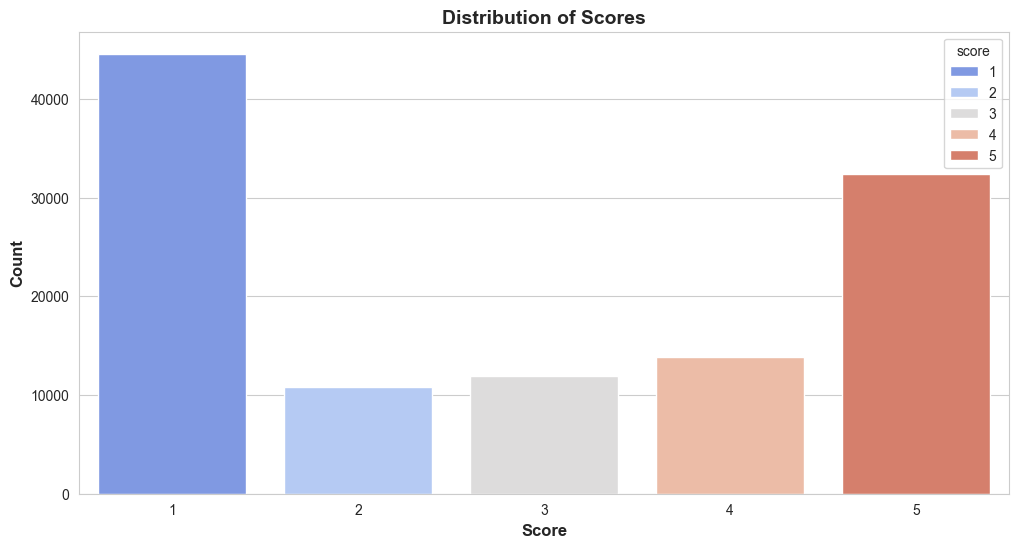

In [25]:
sns.set_style("whitegrid")

score_counts = df['score'].value_counts().sort_index()

plt.figure(figsize=(12, 6))

palette = sns.color_palette("coolwarm", len(score_counts))
sns.barplot(x=score_counts.index, y=score_counts.values, hue=score_counts.index, palette=palette)

plt.xlabel('Score', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title('Distribution of Scores', fontsize=14, fontweight='bold')

plt.show()

We can also check the number of reviews over time.

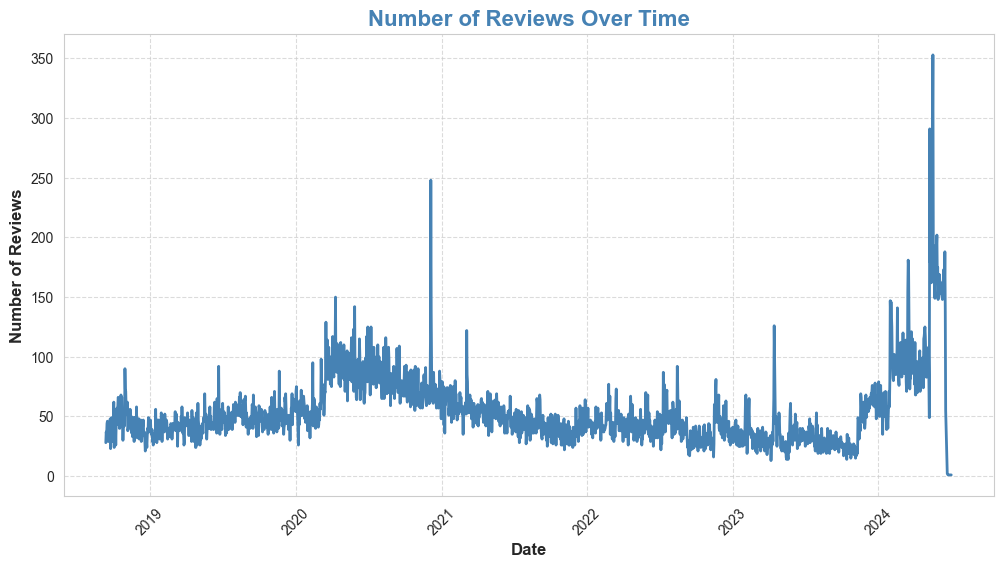

In [26]:
df['review_date'] = pd.to_datetime(df['at']).dt.date

date_counts = df['review_date'].value_counts().sort_index()

plt.figure(figsize=(12, 6))

date_counts.plot(kind='line', color='steelblue', lw=2) 

plt.title('Number of Reviews Over Time', fontsize=16, fontweight='bold', color='steelblue')
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='bold')

plt.xticks(rotation=45)

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

We can also determine the dates of the earliest and latest reviews.

In [27]:
print("Earliest review date:", df['at'].min())
print("Latest review date:", df['at'].max())

Earliest review date: 2018-09-12 07:22:12
Latest review date: 2024-07-02 17:17:53


Let's also check how long the reviews are.

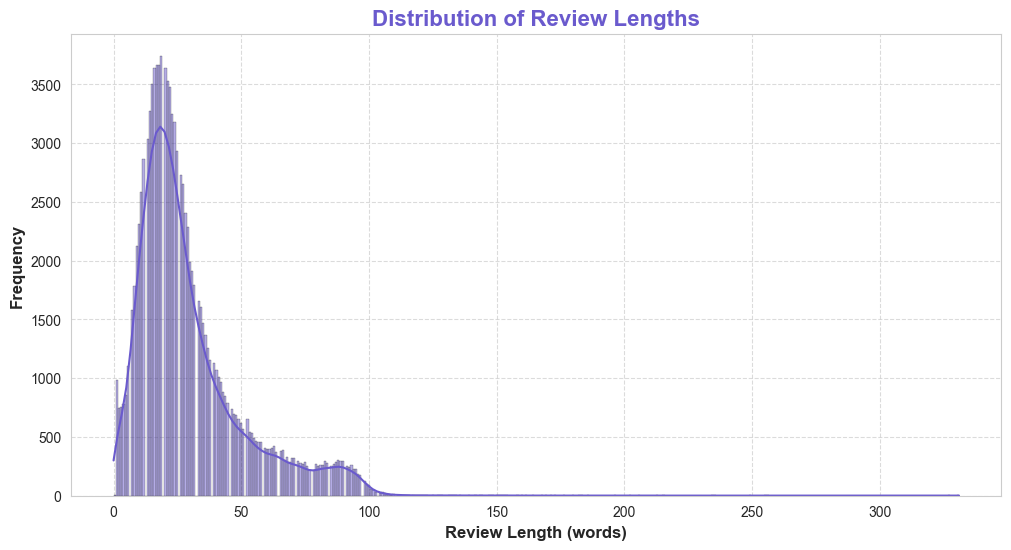

In [28]:
df['review_length'] = df['content'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12, 6))

sns.histplot(data=df, x='review_length', color='slateblue', kde=True, edgecolor='black')

plt.title('Distribution of Review Lengths', fontsize=16, fontweight='bold', color='slateblue')
plt.xlabel('Review Length (words)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

And lastly, we can see how many reviews were given for each year.

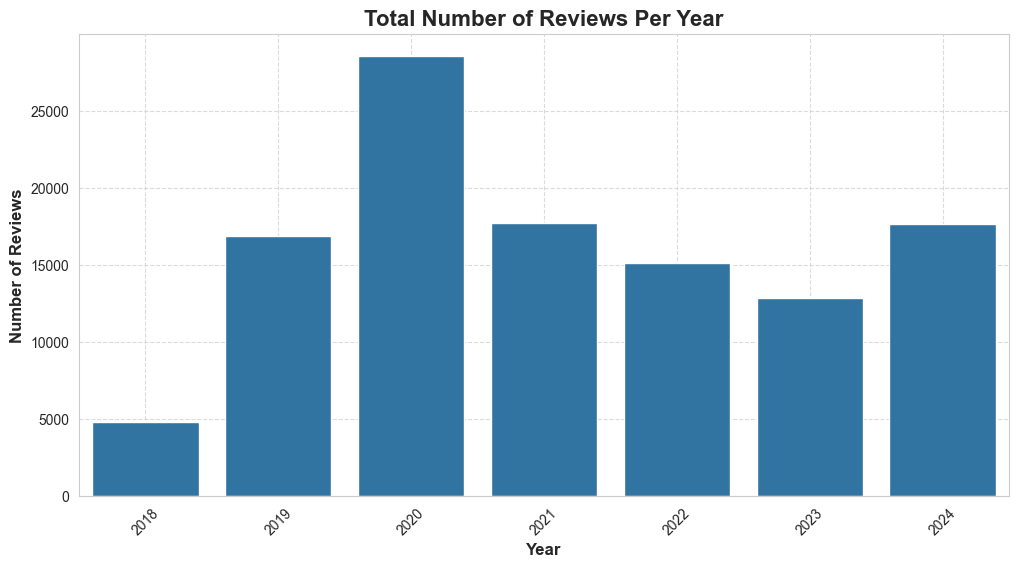

In [29]:
df['at'] = pd.to_datetime(df['at'])

year_counts = df['at'].dt.year.value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=year_counts.index, y=year_counts.values)

plt.title('Total Number of Reviews Per Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='bold')

plt.xticks(rotation=45)

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

## Word cloud

Word cloud illustrates the most frequent and important words per category in bigger font sizes and bolder. It can help identify common issues per category. For example, in the negative reviews below, we notice words like "uninstall", "subscription", "terrible" and "please fix", while in the positive reviews we see "good", "great", "love" and "enjoy".

In [30]:
def determine_sentiment(score):
    if score > 3:
        return 'positive'
    elif score < 3:
        return 'negative'
    else:
        return 'neutral'
    
df['Sentiment'] = df['score'].apply(determine_sentiment)    

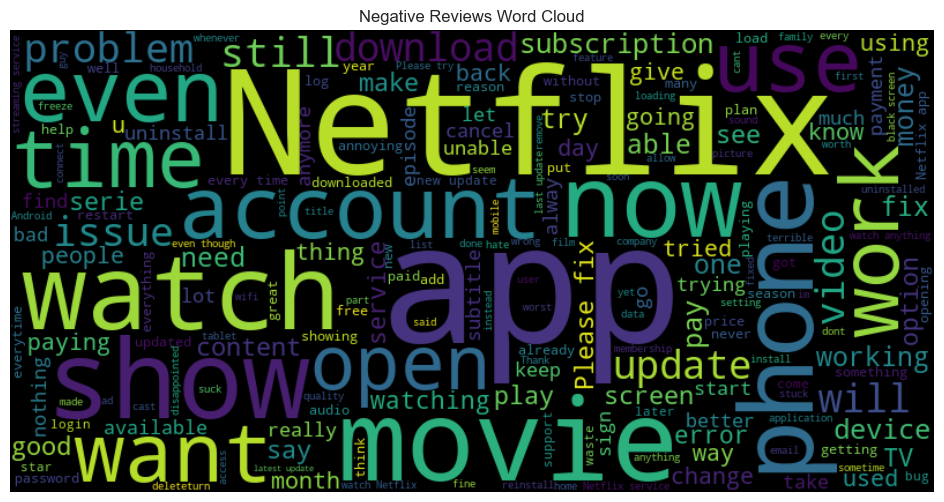

In [32]:
from wordcloud import WordCloud

negative_reviews = ' '.join(df[df['Sentiment'] == 'negative']['content'])

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_reviews)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')
plt.show()

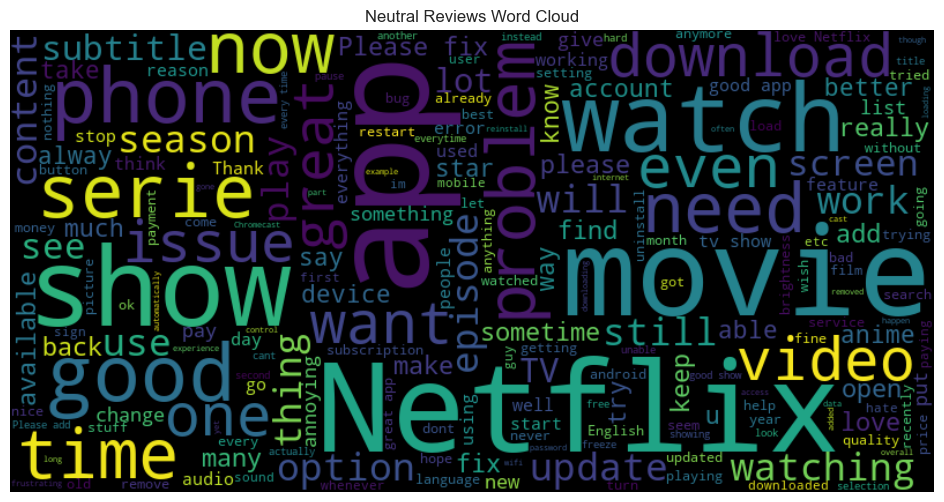

In [ ]:
neutral_reviews = ' '.join(df[df['Sentiment'] == 'neutral']['content'])

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(neutral_reviews)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Neutral Reviews Word Cloud')
plt.show()

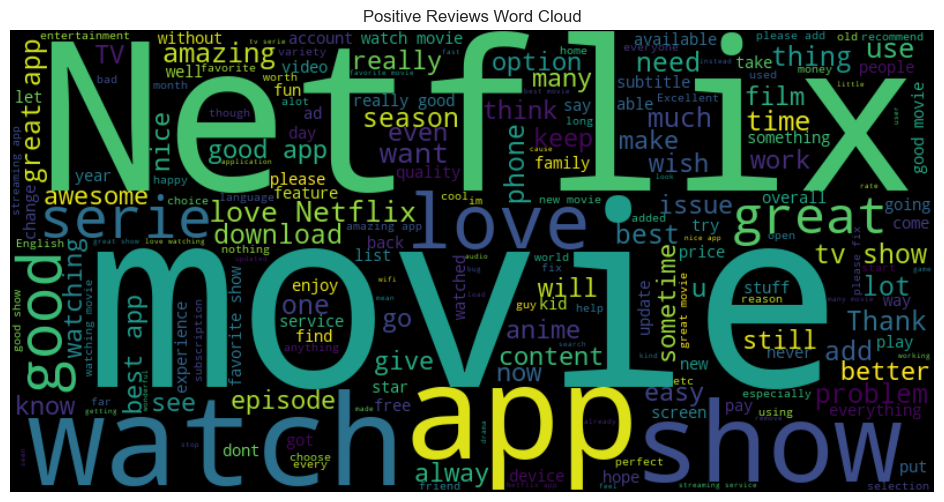

In [ ]:
positive_reviews = ' '.join(df[df['Sentiment'] == 'positive']['content'])

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(positive_reviews)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud')
plt.show()